# Evolution of the Fast Variable

We want to find an initial condition, such that the fast time scale in the systems
evolution is eliminated. We start with the naive approach by setting the 
spring displacement and momentum zero at the beginning:

(0.0, 12.566370614359172)

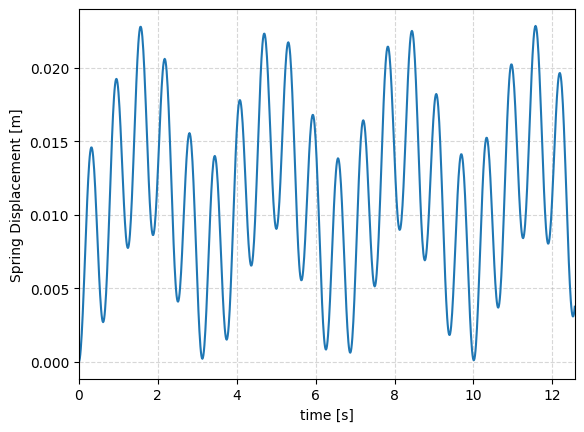

In [1]:
# importing libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import coupled_oscillator as co

# defining the parameters
endtime = 4 * np.pi
gravity = 1
mass = 1
length = 1
spring_constant = 10**2  # freqency of spring is 10 times the frequency of pendulum
osc_prop = co.OscillatorProperties(
    gravity=gravity, mass=mass, length=length, spring_constant=spring_constant, epsilon=1)
hamiltonian = co.Hamiltonian(osc_prop)  # This defines the system of equations

# defining the initial conditions
angle_deg = -45
angle_rad = np.deg2rad(angle_deg)
spring_displacement = 0
phase_ini = co.Phase(osc_prop, angle=angle_rad, displacement=spring_displacement)

# solving the system of equations for the unbalanced case
evolution_unbalanced = co.solve(
    hamiltonian=hamiltonian, 
    phase=phase_ini,
    num_points=1000,
    time_span=[0, endtime])

# solving the system of equations for the gravity equilibrium balancing approach
bal_gravity = co.balancing.GravityEquilibrium(hamiltonian)
evolution_bal_gravity = co.solve(
    hamiltonian=hamiltonian, 
    phase=bal_gravity.balance(phase_ini, time=0),
    num_points=1000,
    time_span=[0, endtime])

# Plotting the results
evolution_unbalanced.displacement.plot()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, endtime)

There are clearly fast oscillations in the displacement of the spring. Our next approach is to balance the initial condition by assuming that the displacement is in equilibrium with the gravity:

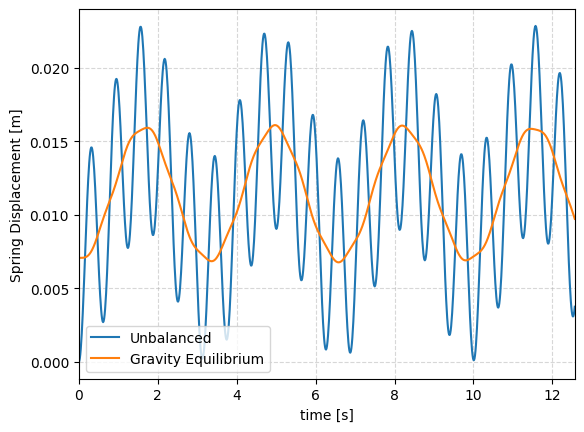

In [2]:
# solving the system of equations for the gravity equilibrium balancing approach
bal_gravity = co.balancing.GravityEquilibrium(hamiltonian)
evolution_bal_gravity = co.solve(
    hamiltonian=hamiltonian, 
    phase=bal_gravity.balance(phase_ini, time=0),
    num_points=1000,
    time_span=[0, endtime])

# Plotting the results
evolution_unbalanced.displacement.plot(label="Unbalanced")
evolution_bal_gravity.displacement.plot(label="Gravity Equilibrium")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, endtime)
plt.legend()

When comparing the evolution of the spring displacement of the unbalanced and gravity equilibrium balanced cases, we can see that the fast oscillations in the gravity equilibrium 
case are almost completely eliminated. But what happens if we apply our balancing operator (the gravity equilibrium) again on the trajectory? Is the residual between the true trajectory and the balanced trajectory the fast oscillation of the system?

Text(0.5, 1.0, 'Residual of the gravity equilibrium balancing approach')

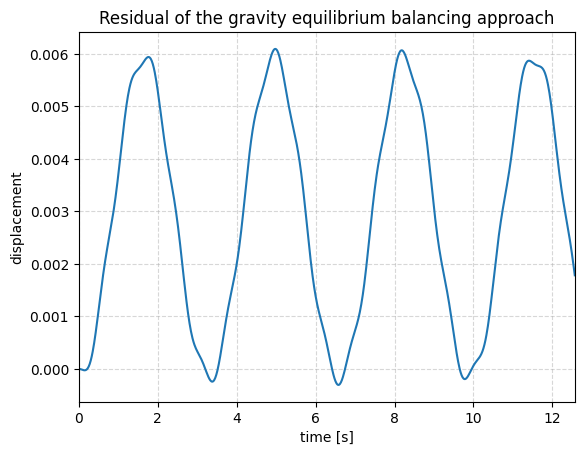

In [3]:
evolution_bal_gravity_balanced = bal_gravity.balance_time_series(evolution_bal_gravity)
evolution_bal_gravity_residual = evolution_bal_gravity - evolution_bal_gravity_balanced

evolution_bal_gravity_residual.displacement.plot()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, endtime)
plt.title("Residual of the gravity equilibrium balancing approach")

The dominant time scale of the residual of the gravity equilibrium balancing approach is the same as the slow timescale of the angle. Hence these residuals can be associated with errors in the gravity equilibrium balancing approach. Next we test the 

## Optimal Balance
approach

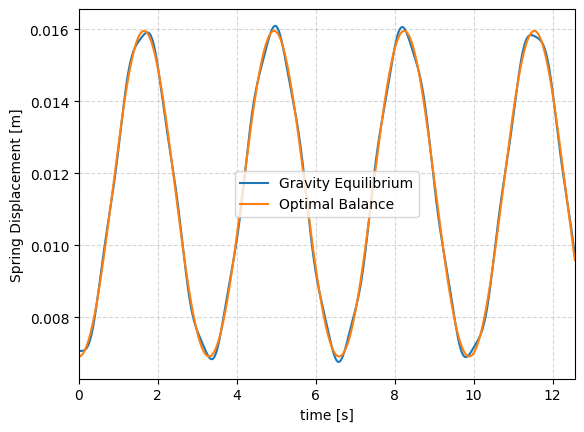

In [4]:
# create the optimal balance method
optimal_balance = co.balancing.OptimalBalance(
    hamiltonian=hamiltonian,
    linear_balance=co.balancing.NaiveBalancer(hamiltonian),
    ramp_method=co.ramp_functions.Exponential,
    ramp_period=10, 
    max_it=5,
    stop_criterion=1e-12)

# balance the initial condition
phase_bal_ob = optimal_balance.balance(phase_ini, time=0)

# compute the evolution of the balanced system
evolution_optimal_balance = co.solve(
    hamiltonian=hamiltonian, 
    phase=optimal_balance.balance(phase_ini, time=0),
    num_points=1000,
    time_span=[0, endtime])

# Plotting the results
evolution_bal_gravity.displacement.plot(label="Gravity Equilibrium")
evolution_optimal_balance.displacement.plot(label="Optimal Balance")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, endtime)
plt.legend()

Similar as with the gravity equilibrium balancing approach, the fast oscillations 
in the optimal balanced trajectory are no longer visible in the displacement of the 
pendulum. In contrast to the gravity equilibrium balancing approach, the displacement evolution
looks smoother. Let's have a look at the residual of the optimal balance approach.

Text(0.5, 1.0, 'Residual of the optimal balance balancing approach')

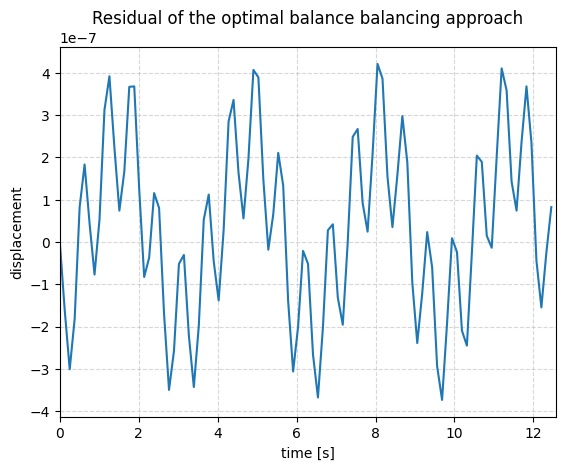

In [5]:
# first we drop some data from the evolution to save computation time
# only take every 10th data point
evolution_ob_balanced = optimal_balance.balance_time_series(
    evolution_optimal_balance.isel(time=slice(None, None, 10)))

evolution_ob_residual = evolution_optimal_balance - evolution_ob_balanced

evolution_ob_residual.displacement.plot()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, endtime)
plt.title("Residual of the optimal balance balancing approach")